<a href="https://colab.research.google.com/github/GreeshmaHarids/Final_Project_FeynnLab/blob/main/Credit_Card_Risk_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/datasets_bank/data_credit_card.csv')
df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,state,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,07-01-2019 15:40,3.549200e+15,fraud_Brown Inc,kids_pets,58.24,M,ME,02-04-1933,4d1136092834346625f717cb42c6ce2a,1325950818,44.052093,-71.105152,0
1,07-01-2019 15:40,3.596360e+15,fraud_Sawayn PLC,shopping_pos,6.58,M,PA,27-05-1973,9c698943302b76afb7b6c679fd970ae3,1325950839,41.078042,-78.041940,0
2,07-01-2019 15:41,4.220350e+12,fraud_Hoppe-Parisian,kids_pets,121.43,M,MI,20-01-1960,de26bbac4d41eb7af87ce0ba2c2ec50b,1325950889,42.677860,-82.797530,0
3,07-01-2019 15:41,6.011350e+15,fraud_Collier LLC,home,112.25,M,AL,12-07-1980,b48e148b35323806ee47885b531eadd3,1325950893,33.666316,-86.177033,0
4,07-01-2019 15:41,3.858850e+13,"fraud_Graham, Hegmann and Hammes",food_dining,8.71,F,TX,23-11-1990,361dbb0576ac55c0eff7f8c4b347c170,1325950913,29.197197,-103.416789,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037488,10-03-2020 16:07,6.011980e+15,fraud_Fadel Inc,health_fitness,77.00,F,MD,28-05-1943,45ecd198c65e81e597db22e8d2ef7361,1362931649,38.779464,-76.317042,0
1037489,10-03-2020 16:07,4.839040e+15,"fraud_Cremin, Hamill and Reichel",misc_pos,116.94,F,IA,28-06-1999,c00ce51c6ebb7657474a77b9e0b51f34,1362931670,41.400318,-92.726724,0
1037490,10-03-2020 16:08,5.718440e+11,"fraud_O'Connell, Botsford and Hand",home,21.27,F,KY,02-04-1952,17c9dc8b2a6449ca2473726346e58e6c,1362931711,37.293339,-84.798122,0
1037491,10-03-2020 16:08,4.646850e+18,fraud_Thompson-Gleason,health_fitness,9.52,F,NY,25-06-1990,5ca650881b48a6a38754f841c23b77ab,1362931718,39.773077,-72.213209,0


In [ ]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'state', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df.isna().sum()

,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
gender,0
state,0
dob,0
trans_num,0
unix_time,0


In [ ]:
df.dtypes


,0
trans_date_trans_time,object
cc_num,float64
merchant,object
category,object
amt,float64
gender,object
state,object
dob,object
trans_num,object
unix_time,int64


In [ ]:
df.shape

(1037493, 13)

### Preprocessing


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037493 entries, 0 to 1037492
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1037493 non-null  object 
 1   cc_num                 1037493 non-null  float64
 2   merchant               1037493 non-null  object 
 3   category               1037493 non-null  object 
 4   amt                    1037493 non-null  float64
 5   gender                 1037493 non-null  object 
 6   state                  1037493 non-null  object 
 7   dob                    1037493 non-null  object 
 8   trans_num              1037493 non-null  object 
 9   unix_time              1037493 non-null  int64  
 10  merch_lat              1037493 non-null  float64
 11  merch_long             1037493 non-null  float64
 12  is_fraud               1037493 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 102.9+ MB


In [ ]:
df.describe()

,cc_num,amt,unix_time,merch_lat,merch_long,is_fraud
count,1.037493e+06,1.037493e+06,1.037493e+06,1.037493e+06,1.037493e+06,1.037493e+06
mean,4.170803e+17,7.029609e+01,1.345111e+09,3.853306e+01,-9.022328e+01,5.742689e-03
std,1.308707e+18,1.603944e+02,1.005464e+07,5.110427e+00,1.376411e+01,7.556267e-02
min,6.041621e+10,1.000000e+00,1.325951e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800400e+14,9.640000e+00,1.336931e+09,3.472832e+01,-9.689631e+01,0.000000e+00
50%,3.520550e+15,4.743000e+01,1.345124e+09,3.936308e+01,-8.743813e+01,0.000000e+00
75%,4.642260e+15,8.305000e+01,1.354397e+09,4.195676e+01,-8.023286e+01,0.000000e+00
max,4.992350e+18,2.894890e+04,1.362932e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [ ]:

# Convert date columns to datetime with the correct format
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%d-%m-%Y %H:%M', dayfirst=True)
df['dob'] = pd.to_datetime(df['dob'], format='%d-%m-%Y', dayfirst=True)

# Check the result
print(df['trans_date_trans_time'].head())
print(df['dob'].head())


0   2019-01-07 15:40:00
1   2019-01-07 15:40:00
2   2019-01-07 15:41:00
3   2019-01-07 15:41:00
4   2019-01-07 15:41:00
Name: trans_date_trans_time, dtype: datetime64[ns]
0   1933-04-02
1   1973-05-27
2   1960-01-20
3   1980-07-12
4   1990-11-23
Name: dob, dtype: datetime64[ns]


In [ ]:
df.dtypes


,0
trans_date_trans_time,datetime64[ns]
cc_num,float64
merchant,object
category,object
amt,float64
gender,object
state,object
dob,datetime64[ns]
trans_num,object
unix_time,int64


In [ ]:
df.drop_duplicates(inplace=True)


In [ ]:
# Convert categorical columns to category dtype
df['gender'] = df['gender'].astype('category')
df['category'] = df['category'].astype('category')
df['merchant'] = df['merchant'].astype('category')
df['state'] = df['state'].astype('category')


### EDA

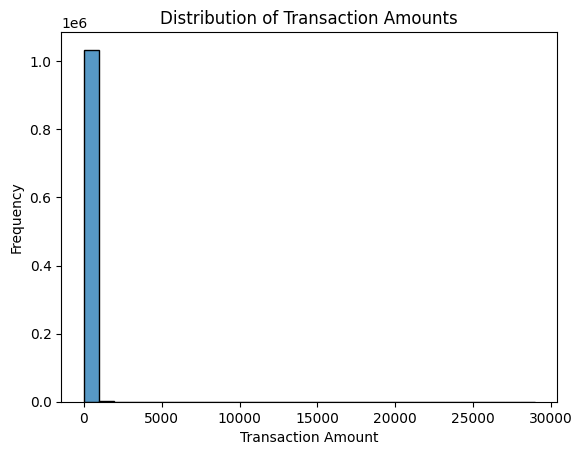

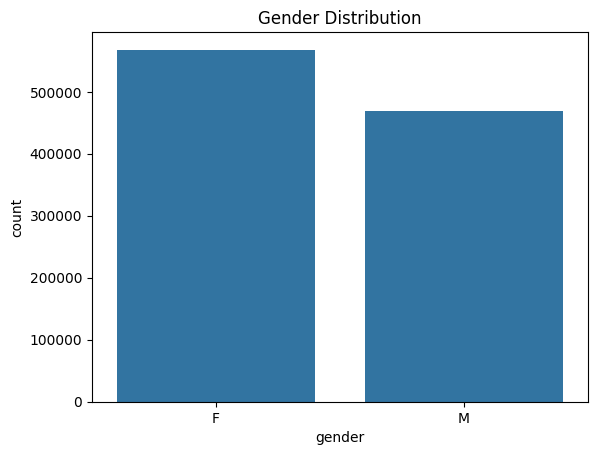

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of transaction amounts
sns.histplot(df['amt'], bins=30)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Countplot for categorical variables
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()


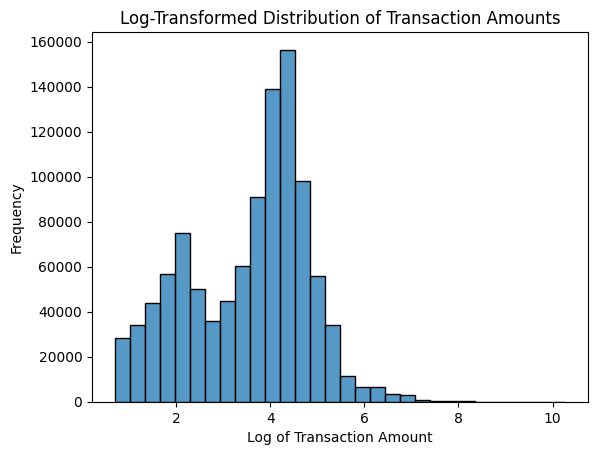

In [ ]:
df['log_amount'] = np.log(df['amt'] + 1)
sns.histplot(df['log_amount'], bins=30)
plt.title('Log-Transformed Distribution of Transaction Amounts')
plt.xlabel('Log of Transaction Amount')
plt.ylabel('Frequency')
plt.show()


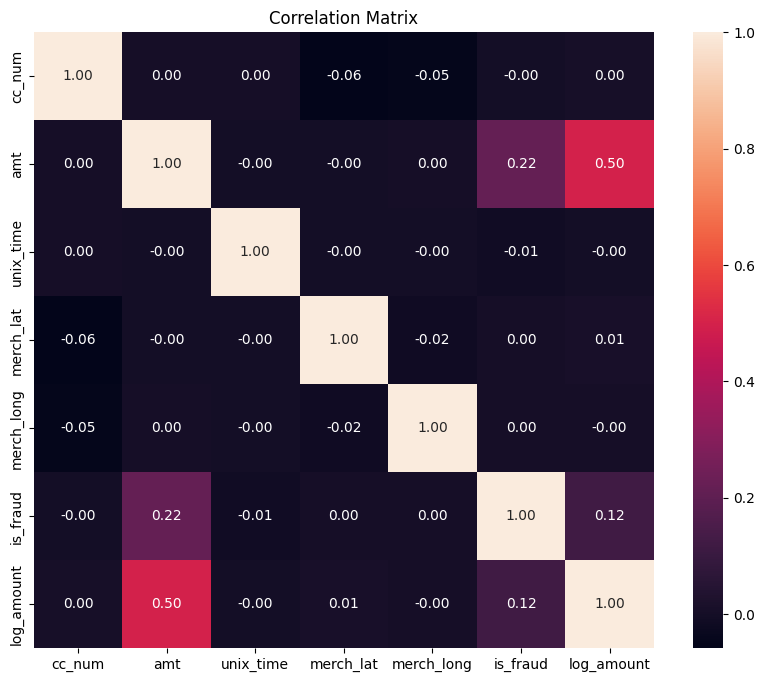

In [ ]:
#Correlation analysis
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
#feature engineering

df['age'] = (pd.to_datetime('today') - df['dob']).dt.days // 365
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
df['trans_month'] = df['trans_date_trans_time'].dt.month


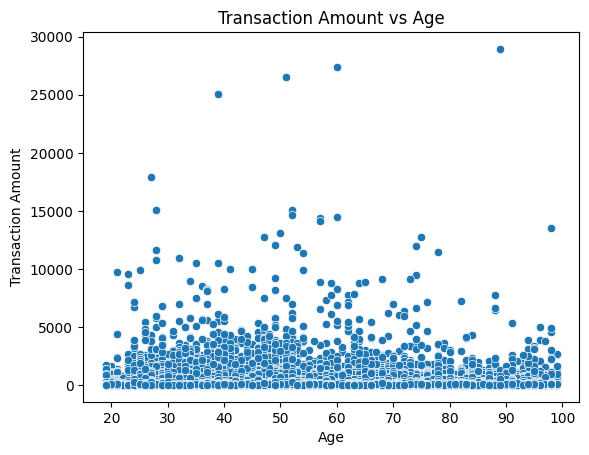

In [ ]:
#Transaction amount by age
sns.scatterplot(x='age', y='amt', data=df)
plt.title('Transaction Amount vs Age')
plt.xlabel('Age')
plt.ylabel('Transaction Amount')
plt.show()



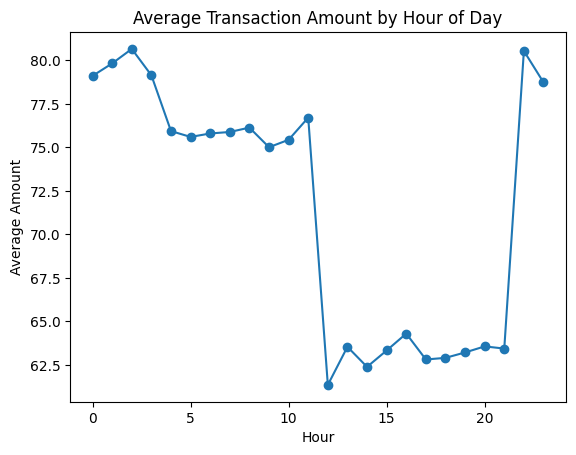

In [ ]:
#transaction Patterns by Time of Day
df.groupby('trans_hour')['amt'].mean().plot(kind='line', marker='o')
plt.title('Average Transaction Amount by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Amount')
plt.show()


The graph shows high average transaction amounts at midnight and 10 PM, with a sharp decline after 9 AM. The lowest transaction amounts occur between 10 AM and 3 PM, indicating a midday lull. There is a recovery in spending from 4 PM onwards, with peaks in the evening. Businesses could use this data to target promotions during low-transaction periods to boost sales.

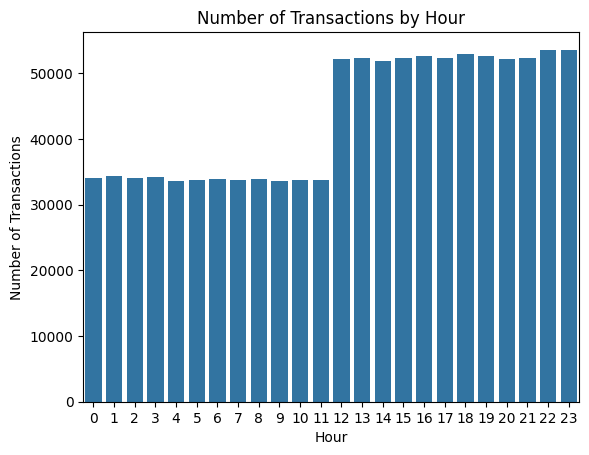

In [ ]:

sns.countplot(x='trans_hour', data=df)
plt.title('Number of Transactions by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Transactions')
plt.show()


The graph shows a spike in the number of transactions starting at 12 PM, peaking until 8 PM with over 50,000 transactions per hour. Early morning hours (midnight to 10 AM) see fewer transactions, averaging around 30,000 to 35,000 per hour. There is also a late evening uptick in transactions at 10 PM and 11 PM. Businesses can expect the highest transaction volumes during midday and late evening periods.

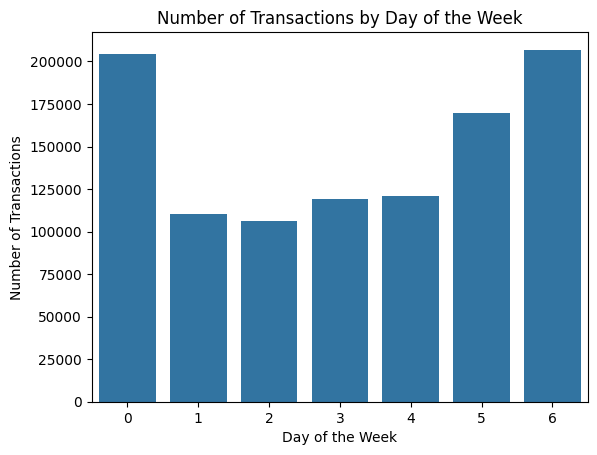

In [ ]:
sns.countplot(x='trans_day_of_week', data=df)
plt.title('Number of Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.show()


The graph shows that transaction volumes are highest on Sundays (Day 0) and Saturdays (Day 6), with over 200,000 transactions on both days. Weekdays from Monday to Thursday (Days 1 to 4) have fewer transactions, ranging between 100,000 to 150,000. Friday (Day 5) sees a rise in activity, reaching nearly 175,000 transactions. This suggests weekends are the busiest for transactions, with Fridays also showing increased activity.

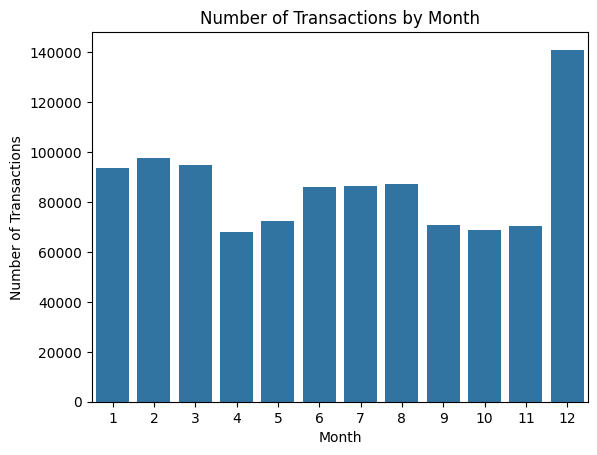

In [ ]:
sns.countplot(x='trans_month', data=df)
plt.title('Number of Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()


This likely reflects the holiday season, where consumer spending spikes due to holiday shopping, gift buying, and festive events.

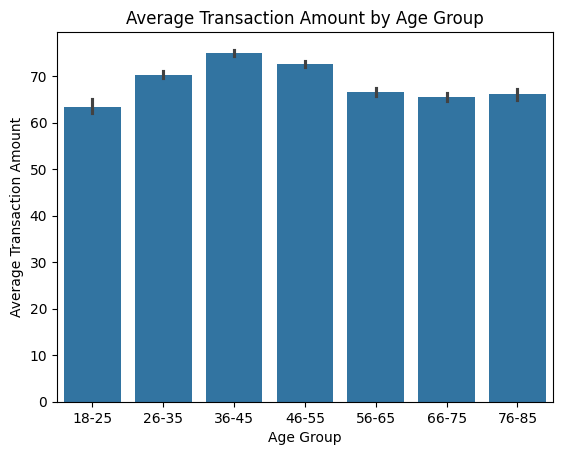

In [ ]:
bins = [18, 25, 35, 45, 55, 65, 75, 85]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

sns.barplot(x='age_group', y='amt', data=df)
plt.title('Average Transaction Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Transaction Amount')
plt.show()


This suggests that individuals in the 36-45 age range are likely in their peak earning years, enabling higher spending. The 46-55 age group still spends considerably but slightly less than the younger group. The 26-35 group, while still significant, may have lower average transactions due to being earlier in their careers or having different financial priorities.

<ipython-input-127-d7e6123ccb1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_hour'] = df['trans_date_trans_time'].dt.hour
<ipython-input-127-d7e6123ccb1f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_day_of_week'] = df['trans_date_trans_time'].dt.dayofweek


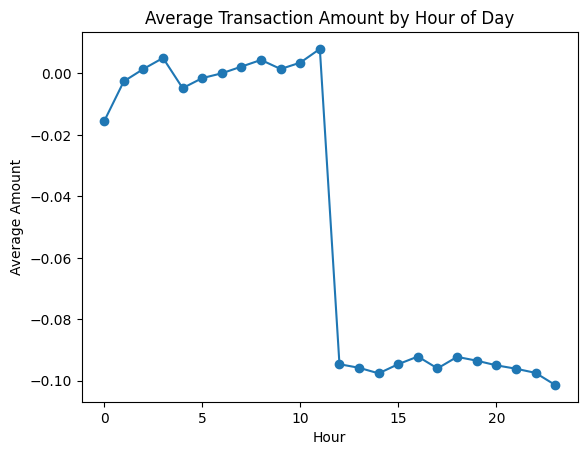

In [ ]:
# Add time features
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_day_of_week'] = df['trans_date_trans_time'].dt.dayofweek

# Average transaction amount by hour
avg_amt_by_hour = df.groupby('trans_hour')['amt'].mean()
avg_amt_by_hour.plot(kind='line', marker='o')
plt.title('Average Transaction Amount by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Amount')
plt.show()


Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['category'] = le.fit_transform(df['category'])
df['merchant'] = le.fit_transform(df['merchant'])
df['state'] = le.fit_transform(df['state'])
df['gender'] = le.fit_transform(df['gender'])



In [ ]:
df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,state,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,log_amount,age,trans_hour,trans_day_of_week,trans_month,age_group
0,2019-01-07 15:40:00,3.549200e+15,78,7,58.24,1,21,1933-04-02,4d1136092834346625f717cb42c6ce2a,1325950818,44.052093,-71.105152,0,4.081597,91,15,0,1,NaN
1,2019-01-07 15:40:00,3.596360e+15,545,12,6.58,1,38,1973-05-27,9c698943302b76afb7b6c679fd970ae3,1325950839,41.078042,-78.041940,0,2.025513,51,15,0,1,46-55
2,2019-01-07 15:41:00,4.220350e+12,264,7,121.43,1,22,1960-01-20,de26bbac4d41eb7af87ce0ba2c2ec50b,1325950889,42.677860,-82.797530,0,4.807539,64,15,0,1,56-65
3,2019-01-07 15:41:00,6.011350e+15,97,6,112.25,1,1,1980-07-12,b48e148b35323806ee47885b531eadd3,1325950893,33.666316,-86.177033,0,4.729598,44,15,0,1,36-45
4,2019-01-07 15:41:00,3.858850e+13,205,1,8.71,0,43,1990-11-23,361dbb0576ac55c0eff7f8c4b347c170,1325950913,29.197197,-103.416789,0,2.273156,33,15,0,1,26-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037488,2020-03-10 16:07:00,6.011980e+15,166,5,77.00,0,20,1943-05-28,45ecd198c65e81e597db22e8d2ef7361,1362931649,38.779464,-76.317042,0,4.356709,81,16,1,3,76-85
1037489,2020-03-10 16:07:00,4.839040e+15,110,9,116.94,0,12,1999-06-28,c00ce51c6ebb7657474a77b9e0b51f34,1362931670,41.400318,-92.726724,0,4.770176,25,16,1,3,18-25
1037490,2020-03-10 16:08:00,5.718440e+11,456,6,21.27,0,17,1952-04-02,17c9dc8b2a6449ca2473726346e58e6c,1362931711,37.293339,-84.798122,0,3.103240,72,16,1,3,66-75
1037491,2020-03-10 16:08:00,4.646850e+18,620,5,9.52,0,34,1990-06-25,5ca650881b48a6a38754f841c23b77ab,1362931718,39.773077,-72.213209,0,2.353278,34,16,1,3,26-35


In [ ]:
df.dtypes


,0
trans_date_trans_time,datetime64[ns]
cc_num,float64
merchant,int64
category,int64
amt,float64
gender,int64
state,int64
dob,datetime64[ns]
trans_num,object
unix_time,int64


Normalization

In [ ]:
# List of features to scale
features_to_scale = ['amt', 'age', 'trans_hour', 'trans_day_of_week', 'trans_month']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Apply StandardScaler
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


In [ ]:
from sklearn.ensemble import IsolationForest

# Using Isolation Forest to detect outliers
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
outliers = iso_forest.fit_predict(df[features_to_scale])  # Adjust features_to_scale as necessary
df = df[outliers == 1]  # Keep only inliers


In [ ]:
# Applying log transformation to reduce skewness in transaction amounts
df['log_amt'] = np.log1p(df['amt'])  # log1p is used to handle zero amounts smoothly


<ipython-input-117-e87dbd0664bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_amt'] = np.log1p(df['amt'])  # log1p is used to handle zero amounts smoothly


In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
features_to_scale = ['log_amt', 'age', 'trans_hour', 'trans_day_of_week', 'trans_month']  # adjust as necessary
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


<ipython-input-118-51fb9ec1e0f9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


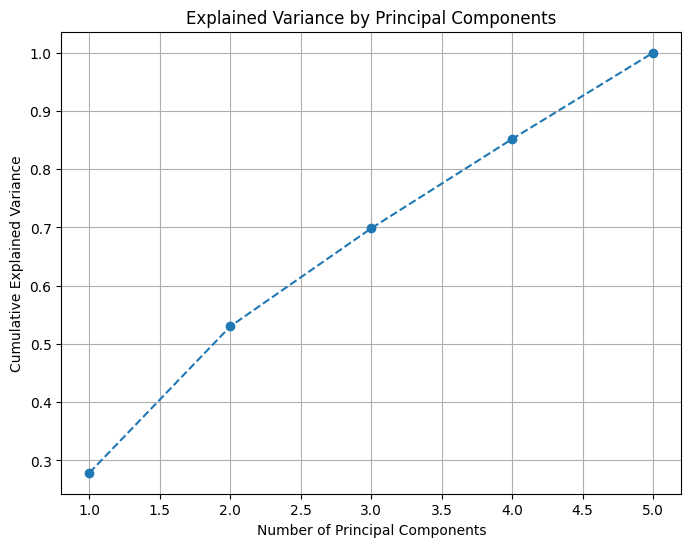

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA().fit(df[features_to_scale])
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Decide on the number of components to keep based on the plot
n_components = next(x for x, val in enumerate(cumulative_variance) if val > 0.95) + 1  # for 95% variance
pca = PCA(n_components=n_components)
pca_df = pca.fit_transform(df[features_to_scale])


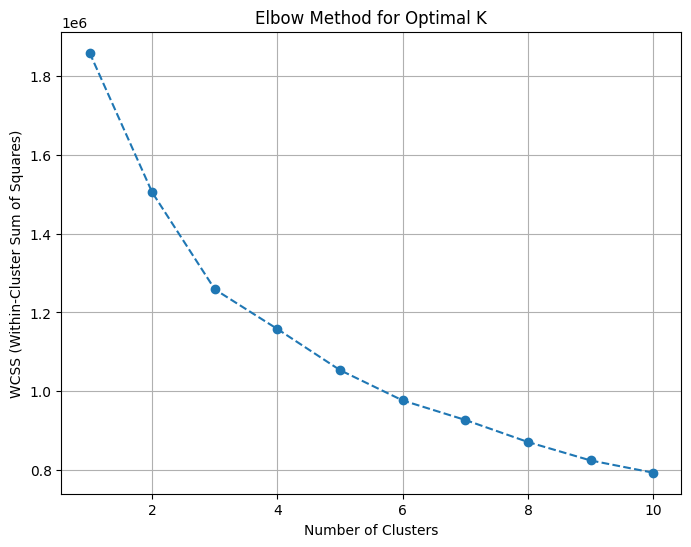

In [ ]:
wcss = []  # within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid()
plt.show()


<ipython-input-121-3e3db692df03>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.fit_predict(pca_df)


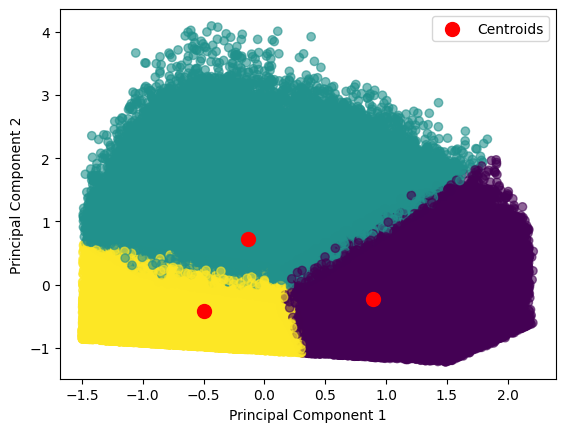

In [ ]:
from sklearn.cluster import KMeans

# Assuming the optimal number of clusters was determined to be 6 previously
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(pca_df)

# Plotting the clusters
plt.scatter(pca_df[:, 0], pca_df[:, 1], c=df['cluster'], cmap='viridis', alpha=0.6)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [ ]:
# Group by the cluster labels and compute summary statistics for each cluster
cluster_profile = df.groupby('cluster').agg({
    'amt': ['mean', 'median'],
    'age': ['mean', 'median'],
    'category': lambda x: x.mode(),
    'state': lambda x: x.mode()
})
print(cluster_profile)


              amt                 age        category    state
             mean    median      mean median <lambda> <lambda>
cluster                                                       
0       -0.187805 -0.253663  0.972118   0.88        2       34
1        0.318688  0.155579 -0.158479  -0.16        4       43
2       -0.266593 -0.326795 -0.287442  -0.32        6       43


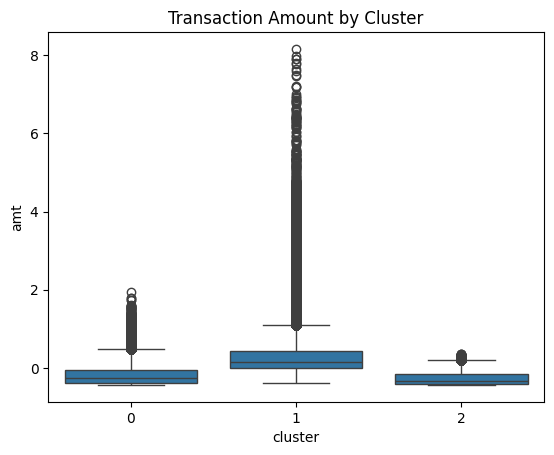

In [ ]:
#visualizing cluster profiles
sns.boxplot(x='cluster', y='amt', data=df)
plt.title('Transaction Amount by Cluster')
plt.show()


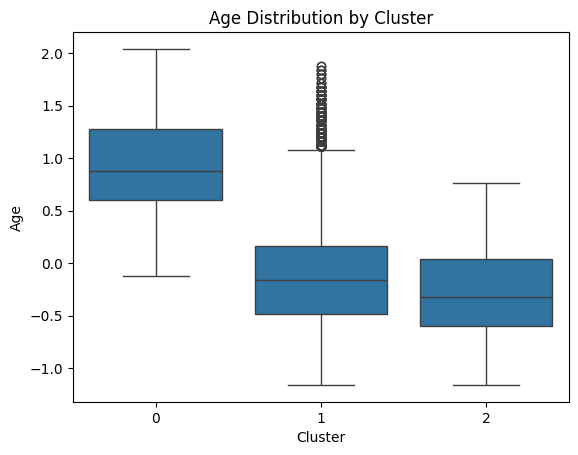

In [ ]:
# Age distribution by cluster using a boxplot
sns.boxplot(x='cluster', y='age', data=df)
plt.title('Age Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()


The age distribution by cluster shows that Cluster 0 contains older individuals with a wider age range and no significant outliers. Cluster 1 has a younger median age with several outliers, indicating more age variability within the cluster. Cluster 2 has a narrower distribution with fewer outliers and a slightly older median age compared to Cluster 1.

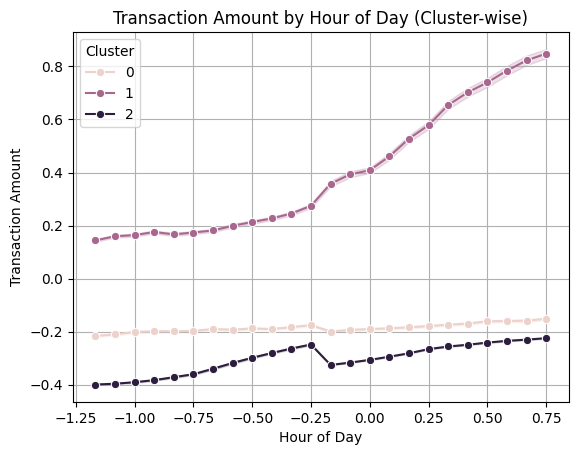

In [ ]:
# Average transaction amount by hour of day for each cluster
sns.lineplot(x='trans_hour', y='amt', hue='cluster', data=df, marker='o')
plt.title('Transaction Amount by Hour of Day (Cluster-wise)')
plt.xlabel('Hour of Day')
plt.ylabel('Transaction Amount')
plt.legend(title='Cluster')
plt.grid()
plt.show()


Spending Behavior:

Cluster 1 is characterized by higher transaction amounts, possibly indicating a demographic with higher disposable income or spending power.
Clusters 0 and 2 show lower transaction amounts, suggesting more conservative spending habits or demographic factors that influence lower expenditure.

Age Distribution:

Cluster 1 appears to have a younger demographic compared to Clusters 0 and 2, which may be older and have different spending priorities or capacities.


In [ ]:
from sklearn.model_selection import train_test_split

X = df[features_to_scale]
y = df['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import xgboost as xgb

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:25:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(X_test)


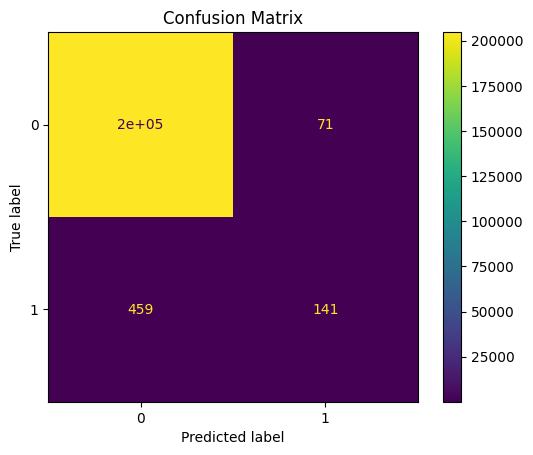

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    204824
           1       0.67      0.23      0.35       600

    accuracy                           1.00    205424
   macro avg       0.83      0.62      0.67    205424
weighted avg       1.00      1.00      1.00    205424



In [ ]:
from sklearn.metrics import roc_auc_score

y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC Score: {roc_auc:.2f}')


ROC AUC Score: 0.98


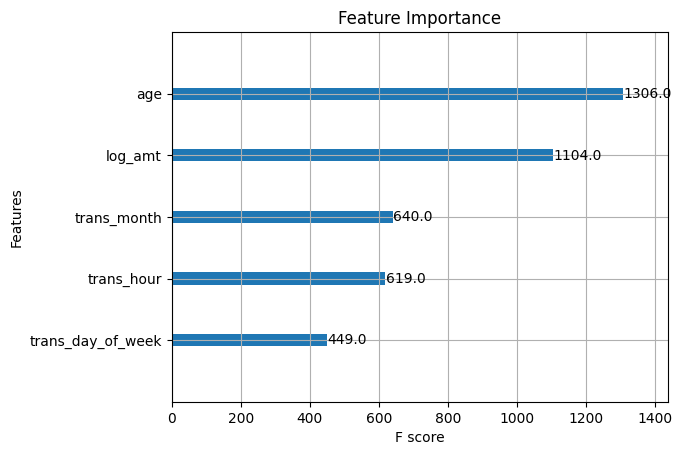

In [ ]:
import matplotlib.pyplot as plt

xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()


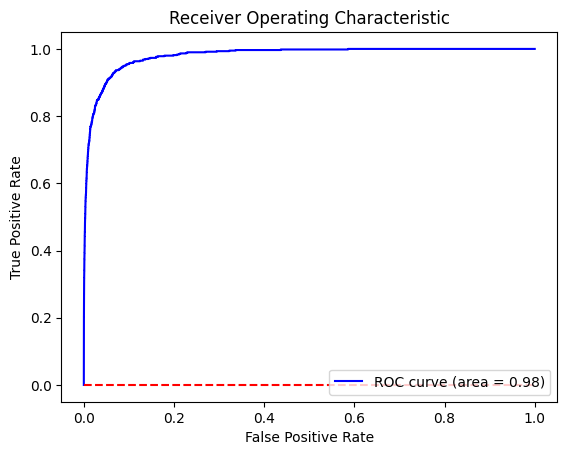

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 0], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
